In [83]:
%matplotlib inline
import numpy as np              
import pandas as pd
from sklearn import preprocessing
import math

# Set charts to view inline
%matplotlib inline

In [84]:
# function that checks if the variable is a float
def isFloat(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [85]:
train = pd.read_csv("DailyDelhiClimateTrain.csv")
test = pd.read_csv("DailyDelhiClimateTest.csv")


df = pd.concat([train, test]) 
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [86]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1576.000000,1576.000000,1576.000000,1576.000000
mean,25.221918,60.445229,6.899262,1010.593178
std,7.345014,16.979994,4.510725,175.242704
min,6.000000,13.428571,0.000000,-3.041667
25%,18.500000,49.750000,3.700000,1001.875000
50%,27.166667,62.440476,6.363571,1009.055556
75%,31.142857,72.125000,9.262500,1015.200000
max,38.714286,100.000000,42.220000,7679.333333


In [87]:
# detect values that are NaN in each row
# there are no null values in our data
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E62D39D208>,
      dtype=object)

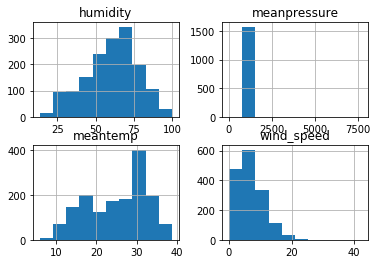

In [88]:
# shows brief look of how the data looks like
df.hist()

## Box plot check for outliers

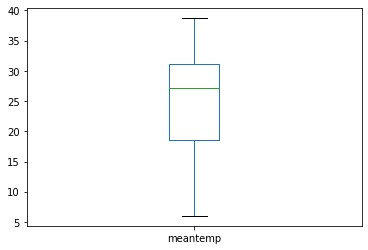

In [89]:
df["meantemp"].plot.box()

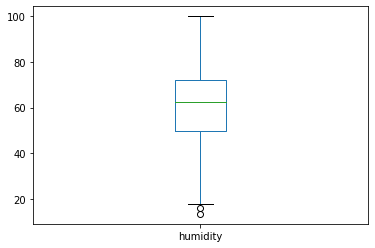

In [90]:
df["humidity"].plot.box()

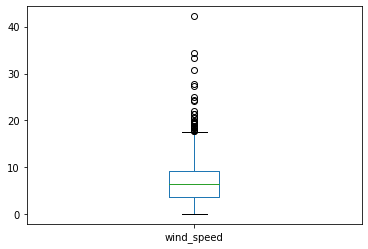

In [91]:
df["wind_speed"].plot.box()

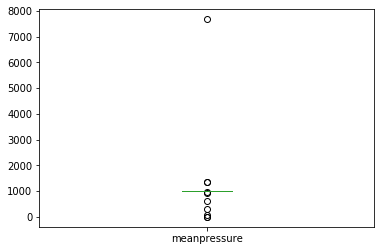

In [92]:
df["meanpressure"].plot.box()
# the outliers are impossible to reach, so we should drop it and replace it with the meanpressure value

In [93]:
df["meanpressure"].min()

-3.0416666666666665

In [94]:
df["meanpressure"].max()

7679.333333333332

In [95]:
# find all outliers and drop
for val in df["meanpressure"]:
    if val < 990 or val > 1300:
        print(val)

7679.333333333332
938.0666666666667
946.3125
310.4375
633.9
-3.0416666666666665
1352.6153846153845
1350.2962962962965
12.045454545454545
59.0


In [96]:
df["meanpressure"] = df["meanpressure"].replace(7679.333333333332, np.nan)
df["meanpressure"] = df["meanpressure"].replace(1352.6153846153845, np.nan)
df["meanpressure"] = df["meanpressure"].replace(1350.2962962962965, np.nan)
df["meanpressure"] = df["meanpressure"].replace(-3.0416666666666665, np.nan)
df["meanpressure"] = df["meanpressure"].replace(12.045454545454545, np.nan)
df["meanpressure"] = df["meanpressure"].replace(59.0, np.nan)
df["meanpressure"] = df["meanpressure"].replace(310.4375, np.nan)
df["meanpressure"] = df["meanpressure"].replace(633.9, np.nan)
df["meanpressure"] = df["meanpressure"].replace(938.0666666666667, np.nan)
df["meanpressure"] = df["meanpressure"].replace(946.3125, np.nan)

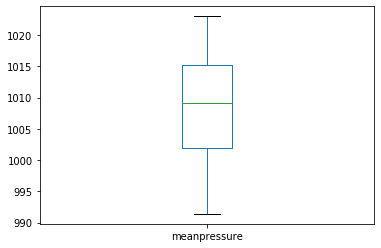

In [97]:
df["meanpressure"].plot.box()

In [98]:
df["meanpressure"].max()

1023.0

In [99]:
df["meanpressure"].fillna(df["meanpressure"].mean(), inplace=True)

In [309]:
# we chose to keep rest of the outliers because all the outliers are important for our data, 
# and the outliers seem to be more continuos and related to the real data

## Density plot

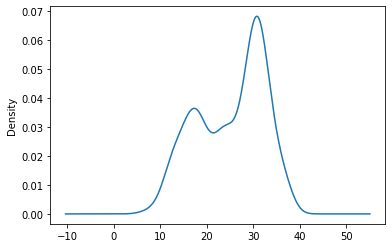

In [101]:
df["meantemp"].plot.density()

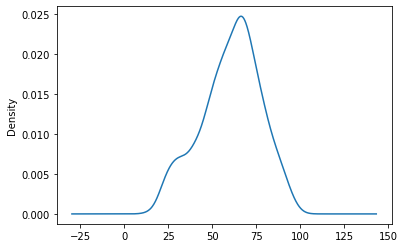

In [102]:
df["humidity"].plot.density()

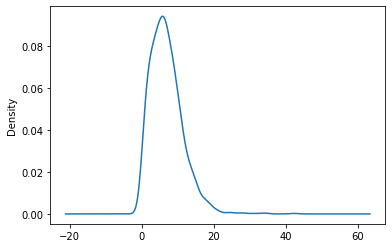

In [103]:
df["wind_speed"].plot.density()

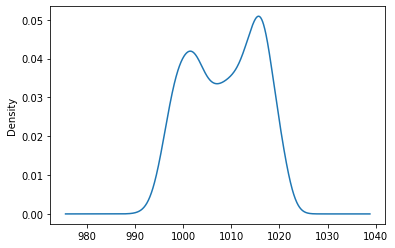

In [104]:
df["meanpressure"].plot.density()

## Center and scale data 

In [285]:
# we chose to center and scale meanpressure here beacause the data has a really large range
# while the rest of the data is readable, we dont perform any actions on the other columns
df_num = df["meanpressure"]

In [106]:
# Calculate column means
colmeans = df_num.sum()/df_num.shape[0]  # Get column means
colmeans

1008.5669753118849

In [107]:
# Subract column means
centered = df_num - colmeans
centered.describe()

count    1.576000e+03
mean     3.123503e-14
std      7.379335e+00
min     -1.719198e+01
25%     -6.566975e+00
50%      4.330247e-01
75%      6.578629e+00
max      1.443302e+01
Name: meanpressure, dtype: float64

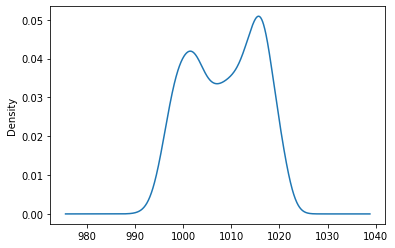

In [108]:
df_num.plot.density()

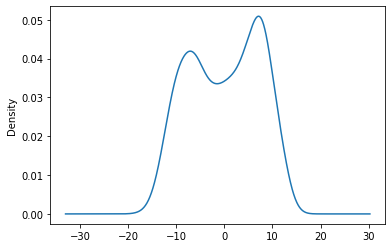

In [109]:
centered.plot.density()

In [110]:
column_deviations = df_num.std(axis=0)   # Get column standard deviations

centered_and_scaled = centered/column_deviations 

centered_and_scaled.describe()

count    1.576000e+03
mean     4.294013e-15
std      1.000000e+00
min     -2.329746e+00
25%     -8.899142e-01
50%      5.868072e-02
75%      8.914935e-01
max      1.955871e+00
Name: meanpressure, dtype: float64

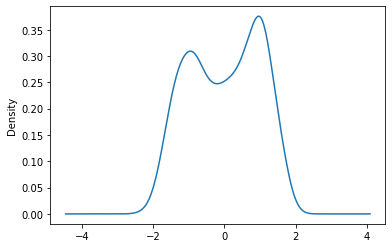

In [111]:
centered_and_scaled.plot.density()

## Data transformation for positively skewed data

In [112]:
# transform data
# as the histogram shown above, we could see that the data for wind_speed are positively skewed, and the scale range is incredibly large,
# so we should normalize it (using min/max scaling) then perform a data transformation
x = df[['wind_speed']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E62EA03388>]],
      dtype=object)

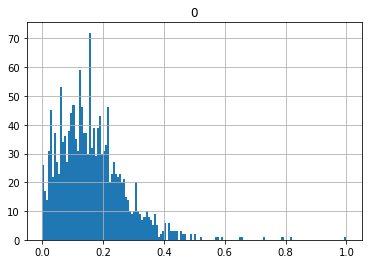

In [113]:
df_normalized.hist(bins=150)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E62EC1D848>]],
      dtype=object)

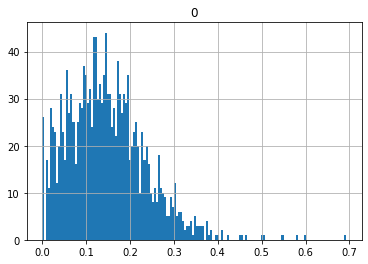

In [114]:
# we chose to do log transformation here because we do not have negative values in our dataset ,otherwise we could have done square root transformation
log_transformed_col = (df_normalized + 1).apply(np.log) # Get the log of the data

log_transformed_col.hist(bins=150) # Plot histogram

In [311]:
# check out the correlations between values, and decide our 3 models based on the result
df.corr()

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.574849,0.288088,-0.878698
humidity,-0.574849,1.000000,-0.373602,0.342656
wind_speed,0.288088,-0.373602,1.000000,-0.273573
meanpressure,-0.878698,0.342656,-0.273573,1.000000


## First model (meantemp ~ meanpressure)

In [286]:
X = df[['meanpressure']]
y = df[['meantemp']]

In [287]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [288]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [289]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for meanpressure is -0.8834662513878184


In [290]:
# regression_model.intercept_ returns an array of intercepts
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 916.2996275494635


In [292]:
regression_model.score(X_test, y_test)
# This means that in our model, 73.4% of the variability in Y can be explained using X

0.7343537357257661

RSME

In [260]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

14.105613630086385

In [261]:
# And now we can calculate the Root Mean Squared Error (RMSE)
import math

math.sqrt(regression_model_mse)

3.7557440847435792

In [262]:
X_test.head()

,meanpressure
1456,1017.200000
353,1016.000000
25,1017.785714
177,996.714286
267,1005.428571


In [264]:
new_data = [[1010.593178]]

regression_model.predict(new_data)

array([[23.4746609]])

## Second model ( meantemp ~ windspeed)

In [293]:
X = df[['wind_speed']]
y = df[['meantemp']]

In [294]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [295]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [296]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for wind_speed is 0.4952983904789372


In [297]:
# regression_model.intercept_ returns an array of intercepts
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 21.84025508027279


In [298]:
regression_model.score(X_test, y_test)
# This means that in our model, 32.9% of the variability in Y can be explained using X

0.03296139350503402

RSME

In [299]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

51.34901100853992

In [300]:
# And now we can calculate the Root Mean Squared Error (RMSE)
import math

math.sqrt(regression_model_mse)

7.165822423737551

In [301]:
X_test.head()

,wind_speed
1456,8.335000
353,4.412500
25,8.467857
177,7.957143
267,6.614286


In [302]:
new_data = [[6.899262]]

regression_model.predict(new_data)
# the calculated result is very different from our original data if we compare them

array([[25.25744844]])

## Third model (meantemp ~ humidity + meanpressure)

In [303]:
X = df[['humidity', 'meanpressure']]
y = df[['meantemp']]

In [304]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [305]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [306]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for humidity is -0.13253761998287267
The coefficient for meanpressure is -0.7707178439208453


In [307]:
# regression_model.intercept_ returns an array of intercepts
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 810.5591275035075


In [280]:
regression_model.score(X_test, y_test)
# This means that in our model, 83.1% of the variability in Y can be explained using X

0.8317268309649145

RSME

In [281]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

8.935176683940885

In [282]:
# And now we can calculate the Root Mean Squared Error (RMSE)
import math

math.sqrt(regression_model_mse)

2.9891765896214437

In [283]:
X_test.head()

,humidity,meanpressure
1456,67.550000,1017.200000
353,91.375000,1016.000000
25,91.642857,1017.785714
177,61.857143,996.714286
267,75.000000,1005.428571


In [284]:
new_data = [[60.445229, 1010.593178]]

regression_model.predict(new_data)

array([[23.66566548]])

**The third model has the highest R square, but it doesn't necessarily means that it is the most accurate model we could retreive from the provided data, it has higher R square due to adding multiple variables**

We applied the mean values calculated to try to predict the mean temperature, the result of accuracy was: 
1. Second model (humidity)
2. Third model (windspeed + meanpressure)
3. First model(meanpresure)

Highest correlation value (calculated by using .corr() method):
1. meanpressure
2. humidity
3. windspeed

Highest R square value:
1. Third model (83.1%)
2. First model (73.4%)
3. Second model (32.9%)

**Whereas, the second model which has wind_speed as the parameter for the regression model was expected to have the most poor performance, but it actually predicted the average mean temperature the best**

**The supposedly "best" model(having the highest correlation score) which is the first model actually did the worst performance**



